<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/241029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cluster [2 1 2 1 0 2 1 2 1 2 2 0 2 1 2 2 1 0 1 0 2 1 1 1 2 2 2 0 0 1 2 0 2 2 1 0 1
 0 2 0 1 0 0 1 2 2 2 2 0 1]
centroid [[0.83797505 0.26313429]
 [0.23709728 0.26143075]
 [0.44077729 0.7592344 ]]
inertia 2.7782931230708705


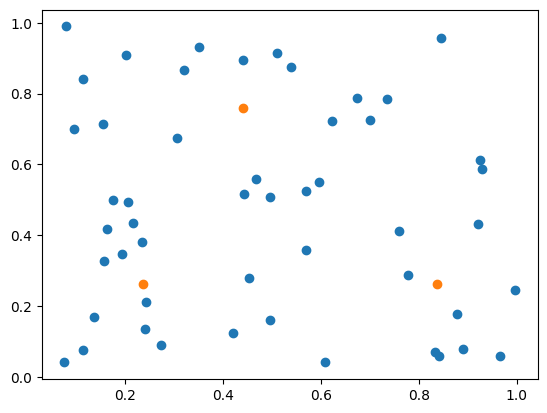

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = np.random.rand(50,2)
plt.scatter(x[:,0],x[:,1])
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print('cluster',kmeans.labels_)
print('centroid',kmeans.cluster_centers_)
print('inertia',kmeans.inertia_)
center = kmeans.cluster_centers_
cx = center[:,0] # cluster X
cy = center[:,1] # cluster Y
plt.scatter(cx,cy)


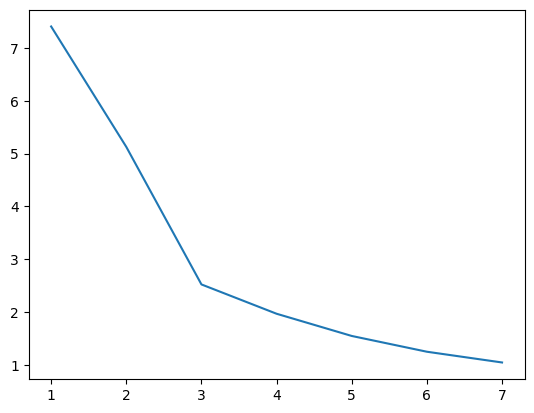

In [2]:
x = np.random.rand(50,2)
inert=[]
for k in range(1,8):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x)
  inert.append(kmeans.inertia_)
plt.plot(range(1,8),inert)

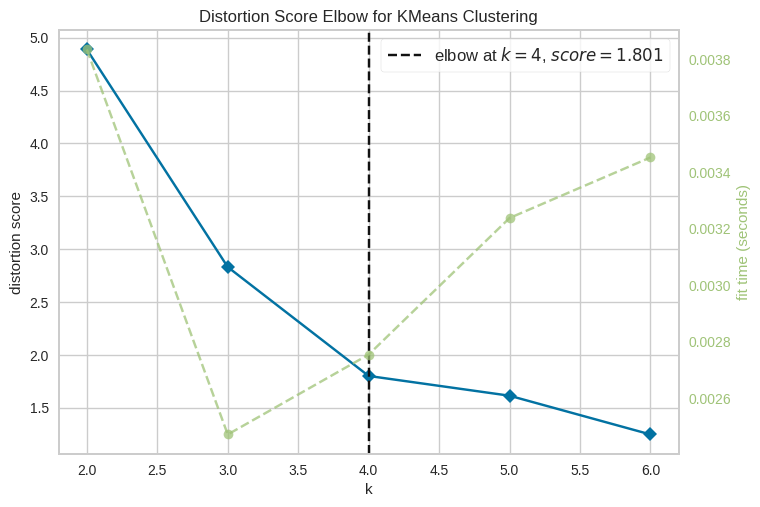

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from yellowbrick.cluster import KElbowVisualizer
x = np.random.rand(50,2)
vis = KElbowVisualizer(KMeans(), k=(2,7))
vis.fit(x)
vis.show()

In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<ipython-input-11-7352602cf1a2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=20)


<Axes: xlabel='Age', ylabel='Density'>

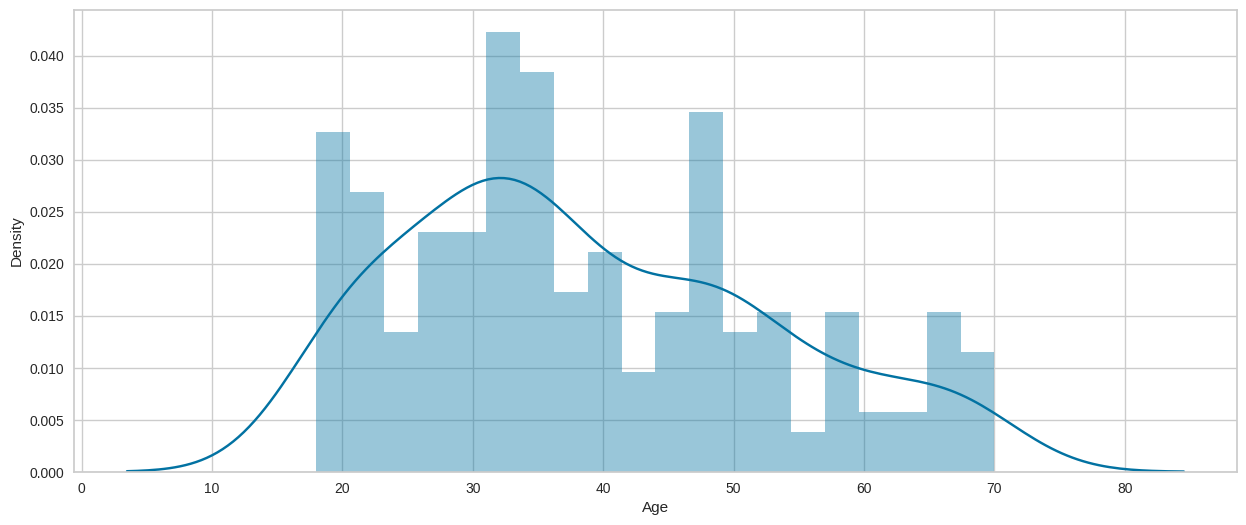

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
sns.distplot(df['Age'],bins=20)

<ipython-input-15-cfe234d6f7fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'],bins=25)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

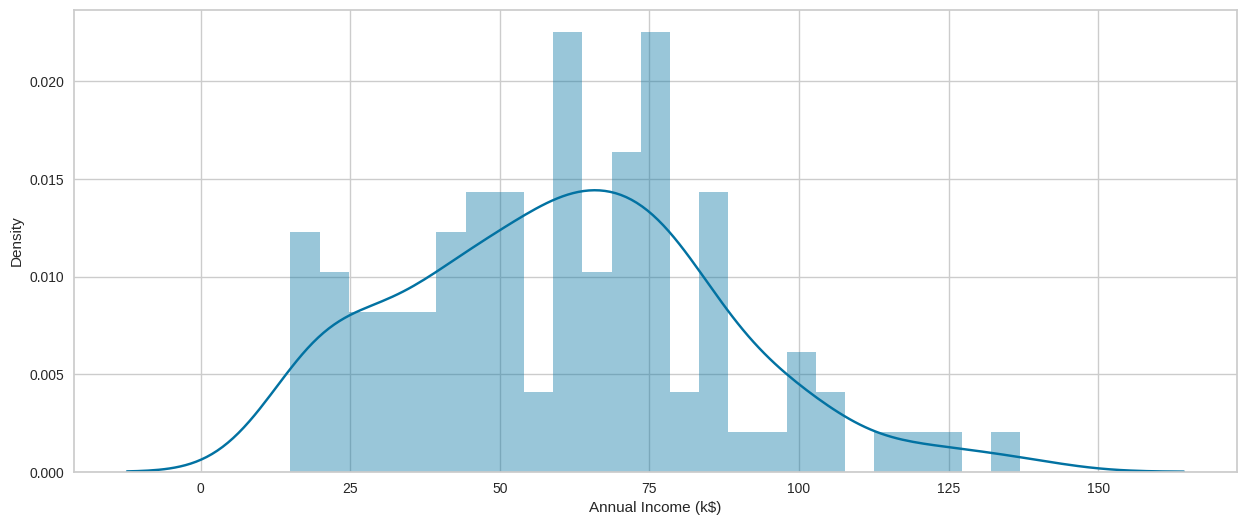

In [15]:
plt.figure(1,figsize=(15,6))
sns.distplot(df['Annual Income (k$)'],bins=25)


<ipython-input-16-c62a92882c14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'],bins=20)


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

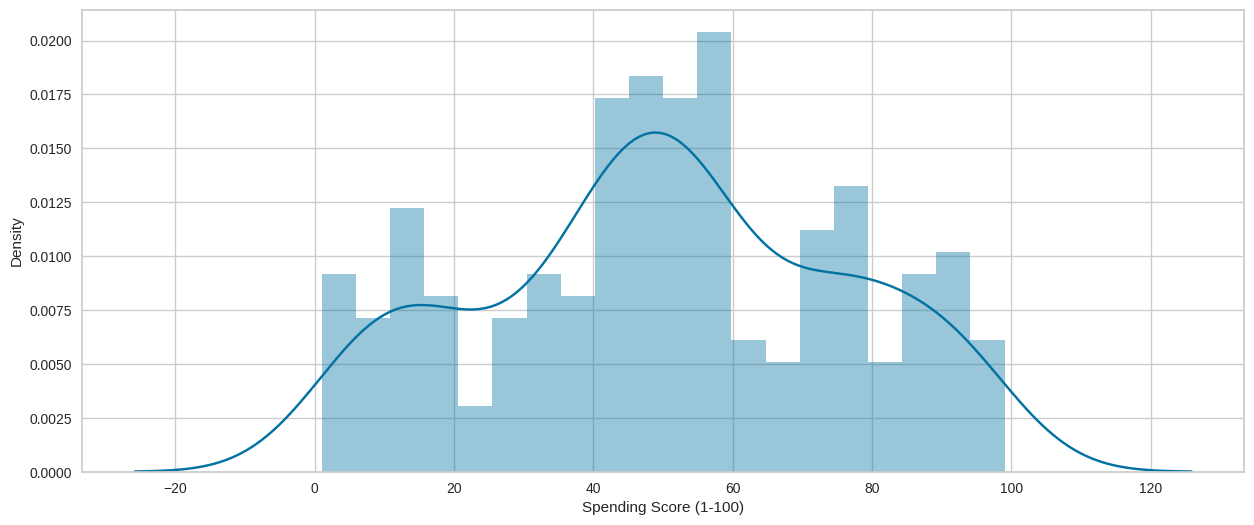

In [16]:
plt.figure(1,figsize=(15,6))
sns.distplot(df['Spending Score (1-100)'],bins=20)

Gender
Female    112
Male       88
Name: count, dtype: int64


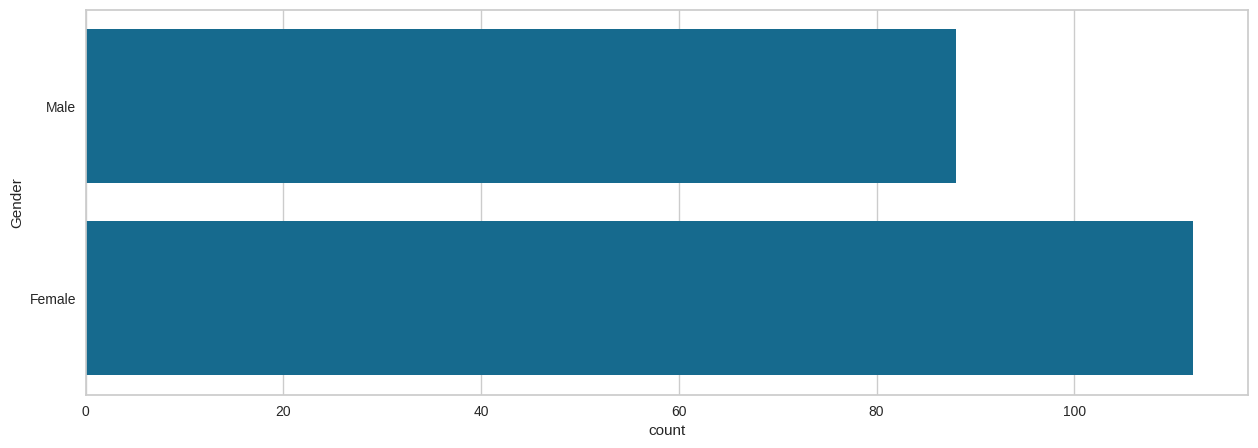

In [17]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=df)
print(df['Gender'].value_counts())

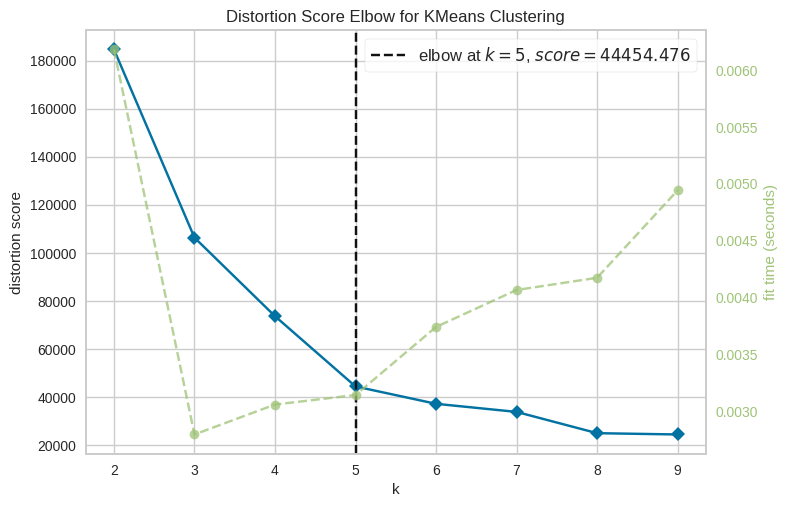

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
data = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model,k=(2,10))
vis.fit(data)
vis.show()

In [19]:
model=KMeans(n_clusters=5)
model.fit(data)
label2=model.labels_
df['label2']=label2
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label2
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

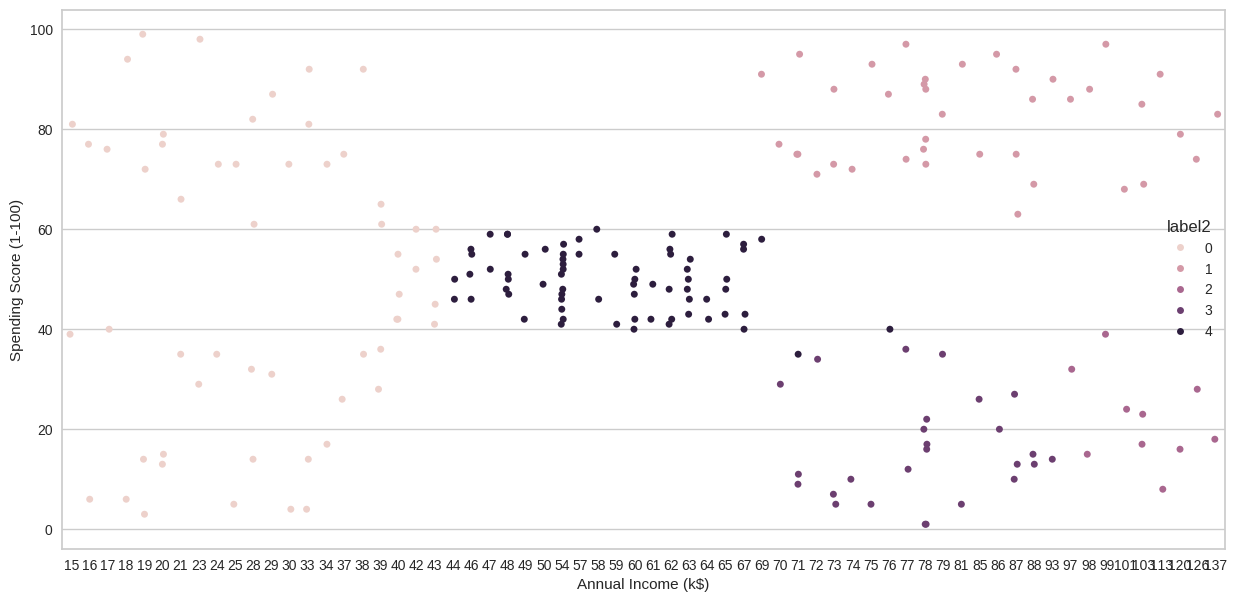

In [20]:
plt.figure(figsize=(15,7))
sns.stripplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=df, hue='label2',jitter=True)